# Project 1

## by Joseph Naro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier

## Part I: 1

### The data set is comprised of 318,573 entries. Each row is a mixture of survey responses and and metadata, like the time time it took a respondent to complete the survey. Between the survey responses and metadata, there are a total of 57 variables per row. 

### I am using a data set from the Open Sex Role Inventories. This is a survey that people took online and was used by psychologists to examine . This data set is comprised of 318,573 responses to that survey.

### Open Sex Role Inventories data from https://www.kaggle.com/lucasgreenwell/open-sex-role-inventory-responses?select=codebook.txt

### Below is the document, which was provided to better understand what each column represents. I will also go over these values further down

This data was collected from an interactive version personality billed as the Open Sex Role Inventory, an alternative to the BSRI, from 2015 - 2019.

See https://openpsychometrics.org/tests/OSRI/development/

The following items were rated on a five point scale, with the labels 1=Disagree, 3=Neutral, 5=Agree:

Q1	I have studied how to win at gambling.
Q2	I have thought about dying my hair.
Q3	I have thrown knives, axes or other sharp things.
Q4	I give people handmade gifts.
Q5	I have day dreamed about saving someone from a burning building.
Q6	I get embarrassed when people read things I have written.
Q7	I have been very interested in historical wars.
Q8	I know the birthdays of my friends.
Q9	I like guns.
Q10	I am happiest when I am in my bed.
Q11	I did not work very hard in school.
Q12	I use lotion on my hands.
Q13	I would prefer a class in mathematics to a class in pottery.
Q14	I dance when I am alone.
Q15	I have thought it would be exciting to be an outlaw.
Q16	When I was a child, I put on fake concerts and plays with my friends.
Q17	I have considered joining the military.
Q18	I get dizzy when I stand up sharply.
Q19	I do not think it is normal to get emotionally upset upon hearing about the deaths of people you did not know.
Q20	I sometimes feel like crying when I get angry.
Q21	I do not remember birthdays.
Q22	I save the letters I get.
Q23	I playfully insult my friends.
Q24	I oppose medical experimentation with animals.
Q25	I could do an impressive amount of push ups.
Q26	I jump up and down in excitement sometimes.
Q27	I think a natural disaster would be kind of exciting.
Q28	I wear a blanket around the house.
Q29	I have burned things up with a magnifying glass.
Q30	I think horoscopes are fun.
Q31	I don't pack much luggage when I travel.
Q32	I have thought about becoming a vegetarian.
Q33	I hate shopping.
Q34	I have kept a personal journal.
Q35	I have taken apart machines just to see how they work.
Q36	I take lots of pictures of my activities.
Q37	I have played a lot of video games.
Q38	I leave nice notes for people now and then.
Q39	I have set fuels, aerosols or other chemicals on fire, just for fun.
Q40	I really like dancing.
Q41	I take stairs two at a time.
Q42	I bake sweets just for myself sometimes.
Q43	I think a natural disaster would be kind of exciting.
Q44	I decorate my things (e.g. stickers on laptop).

On the next page the following questions were asked:

engnat	" Is English you native language?" 1=Yes, 2=No
age	"What is your age?", entered as text (ages <  13 not recorded)
education	"How much education have you completed?" 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
gender	1=Male, 2=Female, 3=Other
orientation	1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
race	1=Mixed race, 2=Asian, 3=Black, 4=Native American, 5=Native Australian, 6=White, 7=Other
religion	1=Atheist/Agnostic, 2=Christian, 3=Muslim, 4=Jewish, 5=Hindu, 6=Buddhist, 7=Other
hand	"What hand do you use to write with?" 	1=Right, 2=Left, 3=Both

The following technical data was also obtained:

country		where the users computer was located (using MaxMind GeoIPLite), ISO country code
IPC		the number of records from the same network location as this record in the dataset, high numbers are not necessarily a problem as they could all be students at the same school for example but # > 1 is possibly because of retakes
source		how the user found the test, based on HTTP Referer info. 1=google, 2=tumblr, 3=facebook/messenger, 4=reddit, 5=bing, 0=other or unknown
introelapse	how many seconds from when the introduction page was loaded until the user started the test
testelapse	how many seconds from when the test was started until the page with the test items was submitted

In [2]:
df = pd.read_csv('data.csv', delimiter='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,...,1,1,1,18,2,2,2,6,1,1
1,1,5,1,1,1,4,5,1,5,5,...,1,0,1,19,2,1,2,6,1,2
2,1,4,3,3,2,5,2,5,2,3,...,1,0,2,18,2,2,1,1,1,1
3,1,1,4,4,5,4,5,5,4,2,...,1,1,1,19,3,2,1,6,2,1
4,1,2,3,4,3,3,5,1,3,2,...,2,1,1,16,2,1,1,6,2,1


In [3]:
df.shape

(318573, 57)

In [4]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

## Part I: 2

### The data set is comprised entirely of integer values, except the country where the respondent took the survey, which is represented by two letter abbreviations. Each of the 44 questions were answered on a scale of 1 to 5, where 1 meant disagree, 3 meant neutral, and 5 meant agree. 0 was used when a respondent did not want to provide an answer. Additionally, things like respondents' ages and sexual orientations were also encoded into integer values. Some values were not limited to a scale or encoding of categorical information. These were the respondent's age, the number of responses from the same network, time to complete the survey from the loading of the intro page, and the time to complete the survey from the loading of the survey page. I will need to preprocess the respondents' ages, because some of the responses are absurd.

In [5]:
#TODO: show unique values for each question
#df[0].unique()
Qs = df.columns[0:44]
Qs

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44'],
      dtype='object')

In [6]:
responses = set()

for Q in Qs:
    for response in df[Q].unique():
        responses.add(response)

responses

{0, 1, 2, 3, 4, 5}

In [7]:
df['engnat'].unique()

array([1, 2, 0], dtype=int64)

In [8]:
df['age'].unique()

array([        18,         19,         16,         20,         17,
               32,         22,         15,         25,         38,
               31,         26,         21,         46,         34,
               60,         45,         42,         24,         23,
               28,         40,         53,         62,         44,
               33,         54,         56,         61,         30,
               37,         39,         50,         35,         14,
               13,         29,         48,         27,         43,
               58,         49,         47,         57,         36,
               59,         52,         55,         68,         41,
               71,         65,        189,         51,         72,
               63,         64,         73,         70,         67,
               88,         66,         69,        100,         82,
               77,         79,         76,         85,         75,
               83,       1337,        420,        534,        

In [9]:
df['education'].unique()

array([2, 3, 1, 4, 0], dtype=int64)

In [10]:
df['gender'].unique()

array([2, 1, 3, 0], dtype=int64)

In [11]:
df['orientation'].unique()

array([2, 1, 0, 3, 5, 4], dtype=int64)

In [12]:
df['race'].unique()

array([6, 1, 3, 2, 7, 0, 4, 5], dtype=int64)

In [13]:
df['religion'].unique()

array([1, 2, 7, 3, 4, 0, 6, 5], dtype=int64)

In [14]:
df['hand'].unique()

array([1, 2, 3, 0], dtype=int64)

In [15]:
df['country'].unique()

array(['US', 'PE', 'CH', 'NL', 'GB', 'CA', 'AE', 'IT', 'DE', 'PH', 'AU',
       'AT', 'JM', 'HU', 'BE', 'TR', 'CO', 'BR', 'JP', 'ZA', 'PL', 'KE',
       'LK', 'PT', 'SE', 'IR', 'RO', 'ID', 'FR', 'FI', 'IN', 'GR', 'PK',
       'ES', 'KR', 'EG', 'SG', 'HK', 'MY', 'NG', 'SV', 'RU', 'MX', 'IE',
       'HR', 'AL', 'LY', 'CZ', 'AR', 'GE', 'LT', 'RS', 'NZ', 'NO', 'IQ',
       'TH', 'CL', 'SI', 'EE', 'NP', 'TW', 'IL', 'VN', 'NONE', 'DK', 'JE',
       'BH', 'TN', 'MK', 'EC', 'LB', 'CK', 'BG', 'BN', 'SN', 'BA', 'TZ',
       'SK', 'UY', 'LV', 'DZ', 'JO', 'SA', 'OM', 'IM', 'CN', 'BB', 'VE',
       'GH', 'BD', 'MA', 'DO', 'MT', 'SR', 'QA', 'KH', 'GT', 'KZ', 'IS',
       'UA', 'PR', 'CR', 'MU', 'BS', nan, 'PA', 'GU', 'PF', 'VC', 'TT',
       'NC', 'CY', 'MD', 'HN', 'DM', 'KY', 'KW', 'ZM', 'LU', 'AF', 'AZ',
       'FJ', 'PY', 'AM', 'PG', 'NI', 'GP', 'ZW', 'VG', 'MQ', 'BO', 'SD',
       'GG', 'GI', 'MM', 'LI', 'BY', 'BF', 'BM', 'BW', 'ME', 'CM', 'MN',
       'HT', 'AW', 'GD', 'PS', 'BT', 'FO', 'UZ', '

In [16]:
df['IPC'].unique()

array([  1,   2,   3,   4,   7,  17,   5,  19,  35,  53,  26,   6,   9,
         8,  24,  14,  10,  25,  82, 113,  32,  21,  16,  12,  15,  72,
        98,  33,  11,  23,  39,  13,  18,  71, 162,  31,  46,  28,  63,
        44,  22, 104,  47,  48,  50,  45,  34,  89,  29,  36,  30,  43,
        52,  40, 128,  56,  20,  37,  61,  64,  41,  60,  84,  65,  38,
        55,  57,  87,  27, 141,  58,  78,  73,  42,  83,  69,  66,  59,
        85, 117,  81, 124,  75, 116,  77,  67], dtype=int64)

In [17]:
df['source'].unique()

array([1, 0, 3, 2, 5, 4], dtype=int64)

In [18]:
df['introelapse'].unique()

array([ 579,   63,   24, ..., 6555, 3100, 5868], dtype=int64)

In [19]:
df['testelapse'].unique()

array([   211,    242,    265, ..., 134429,   6535,   3866], dtype=int64)

## Part I: 3

### The country the respondent took the survey in was not always able to be obtained from the respondents' computers' ISO computer code. For everything else, there still is data, but any 0 represents question that the respondent did not want to answer. As such, it is basically missing data.

In [20]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
count,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,...,318573.000000,318573.000000,318573.000000,3.185730e+05,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000
mean,1.955445,3.872020,2.959422,3.220091,2.894866,3.729054,3.311486,3.274647,2.722400,3.645061,...,3.065335,0.911223,1.209428,7.111159e+03,2.243247,1.639552,1.877915,5.042342,2.274888,1.171951
std,1.362475,1.536921,1.674339,1.490337,1.554775,1.348871,1.487084,1.395627,1.543789,1.262263,...,10.577161,1.166674,0.412783,3.808888e+06,0.813903,0.649020,1.231154,1.904835,2.099926,0.459563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,0.000000,1.000000,1.800000e+01,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,1.000000,0.000000,1.000000,2.000000e+01,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,2.000000,1.000000,2.500000e+01,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,162.000000,5.000000,2.000000,2.147484e+09,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


## Part I: 4

### The requested data can be seen above, but it is not not entirely accurate. For example, while questions 1 through 44 are answered on a scale of one to 5, no answer is entered as a value of zero. This means that zeros will bring down the value. Similarly, the average age is so thrown off by extreme answers that the average age is 711 years old solely going off what respondents say. Some values don't even make sense to average, like the values representing a respondent's religion with 7 possible answers on top of not answering. I will revisit these statistics after preprocessing.

## Part I: 5

### Below are the graphs with my interpretations after each one

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184770486C8>]],
      dtype=object)

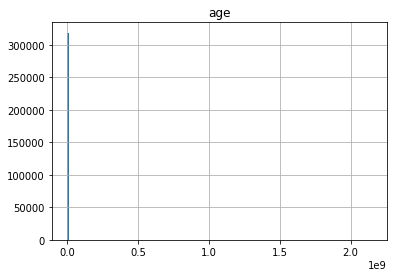

In [21]:
df.hist(column='age', bins=len(df['age'].unique()))

### Here we can see that the extreme values given for ages rendered the histogram for the ages of the respondents useless. Below, I will remove those rows corresponding to an age over 90 on the basis that the respondent could not be trusted to provide honest data.

In [22]:
lied_age = df.loc[df['age'] > 90]
lied_age.shape

(165, 57)

### Removing 165 rows from a dataset with 318,000+ rows will not be a significant loss.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018477021708>]],
      dtype=object)

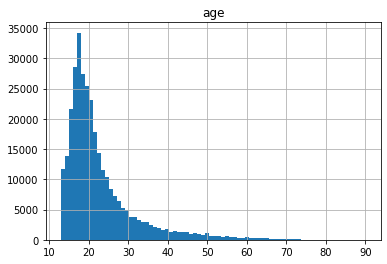

In [23]:
df = df[df['age'] < 91]
df.hist(column='age', bins=len(df['age'].unique()))

### The ages of respondents matches what would be expected on a survey from a university that was distributed online. The bulk of respondents ages match that of grade school and undergraduate students, the very people that are often incentivized to answer these surveys in psychology classes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184771EA448>]],
      dtype=object)

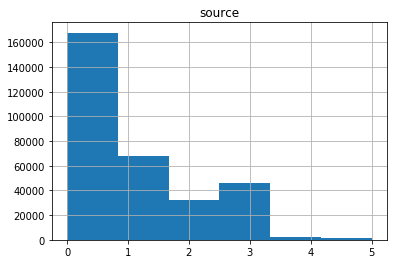

In [24]:
df.hist(column='source', bins=len(df['source'].unique()))

### In this histogram, 0=no response, 1=google, 2=tumblr, 3=facebook/messenger, 4=reddit, 5=bing, 0=other or unknown. This seems to support the theory that a massive portion of respondents were directed to take the survey, and it is not unreasonable to believe that the "other or unknown" were in fact direct links given to students.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001847720C588>]],
      dtype=object)

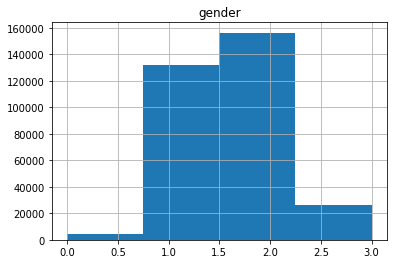

In [25]:
df.hist(column='gender', bins=4)

### In this graph 0=No Response, 1=Male, 2=Female, 3=Non-binary. Here we see that a there were about 20,000 more female respondents than male respondents. There were also around 30,000 non-binary respondents.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001847748B488>]],
      dtype=object)

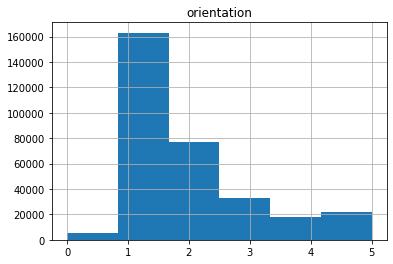

In [26]:
df.hist(column='orientation', bins=6)

### For this histogram 0=No Response, 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other. This graph shows that survey respondents had diverse sexual orientations. Let's see how they break down by gender.

In [27]:
df['male_orientation'] = np.NaN
df['female_orientation'] = np.NaN
df['nonbinary_orientation'] = np.NaN

#cosider converting to ints

df.loc[df['gender'] == 1, 'male_orientation'] = df['orientation']
df.loc[df['gender'] == 2, 'female_orientation'] = df['orientation']
df.loc[df['gender'] == 3, 'nonbinary_orientation'] = df['orientation']

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,age,education,gender,orientation,race,religion,hand,male_orientation,female_orientation,nonbinary_orientation
0,1,4,1,5,2,5,1,5,1,4,...,18,2,2,2,6,1,1,NaN,2.0,NaN
1,1,5,1,1,1,4,5,1,5,5,...,19,2,1,2,6,1,2,2.0,NaN,NaN
2,1,4,3,3,2,5,2,5,2,3,...,18,2,2,1,1,1,1,NaN,1.0,NaN
3,1,1,4,4,5,4,5,5,4,2,...,19,3,2,1,6,2,1,NaN,1.0,NaN
4,1,2,3,4,3,3,5,1,3,2,...,16,2,1,1,6,2,1,1.0,NaN,NaN


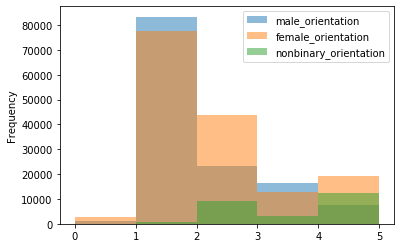

In [28]:
df.plot.hist(y=['male_orientation', 'female_orientation', 'nonbinary_orientation'], bins=5, alpha=0.5)

### Like the last histogram, 0=No Response, 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other. This histogram is very interesting, because it suggests that female respondents are significantly more likely to identify as neither straight nor asexual than male or non-binary respondents. Also interesting is that non-binary respondents leaned hard towards bisexuality or alternative sexualities.

In [29]:
df.drop(columns=['male_orientation', 'female_orientation', 'nonbinary_orientation'], inplace=True)

# Part II: 1

### Using the survey results, I will attempt to guess determine respondent's gender based on seemingly unrelated facts about the respondents. In theory, the models will pick up on gender stereotypes. The weaker the stereotype, the less accurate the model should be. However, it is possible that the models will find entirely unthought of patterns.

# Part II: 2

In [30]:
# get rid of data without target information
df = df.loc[df['gender'] != 0]

In [31]:
for Q in Qs:
    df.loc[df[Q] == 0, Q] = 3

responses = set()

for Q in Qs:
    for response in df[Q].unique():
        responses.add(response)

responses

C:\Users\joeyn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


{1, 2, 3, 4, 5}

In [32]:
mode_keys = ['engnat', 'education', 'orientation', 'race', 'religion', 'hand', 'country', 'IPC', 'source']
mean_keys = ['age', 'introelapse', 'testelapse']

for key in mode_keys:
    mode = df[key].mode()
    df.loc[df[key] == 0, key] = mode

for key in mean_keys:
    mean = int(df[key].mean())
    df.loc[df[key] == 0, key] = mean
    
df['introelapse'].astype('int64')

df[['engnat', 'education', 'orientation', 'race', 'religion', 'hand', 'country', 'IPC', 'source']] = df[['engnat', 'education', 'orientation', 'race', 'religion', 'hand', 'country', 'IPC', 'source']].astype('object')
df.dtypes
 
new_df = df.copy()
df = pd.get_dummies(df)

df.head()

C:\Users\joeyn\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,religion_1.0,religion_2.0,religion_3.0,religion_4.0,religion_5.0,religion_6.0,religion_7.0,hand_1.0,hand_2.0,hand_3.0
0,1,4,1,5,2,5,1,5,1,4,...,1,0,0,0,0,0,0,1,0,0
1,1,5,1,1,1,4,5,1,5,5,...,1,0,0,0,0,0,0,0,1,0
2,1,4,3,3,2,5,2,5,2,3,...,1,0,0,0,0,0,0,1,0,0
3,1,1,4,4,5,4,5,5,4,2,...,0,1,0,0,0,0,0,1,0,0
4,1,2,3,4,3,3,5,1,3,2,...,0,1,0,0,0,0,0,1,0,0


In [33]:
y = df['gender'].to_numpy()
x = df.to_numpy()

In [34]:
x

array([[1, 4, 1, ..., 1, 0, 0],
       [1, 5, 1, ..., 0, 1, 0],
       [1, 4, 3, ..., 1, 0, 0],
       ...,
       [4, 1, 5, ..., 1, 0, 0],
       [5, 3, 5, ..., 1, 0, 0],
       [1, 5, 5, ..., 1, 0, 0]], dtype=int64)

In [35]:
y

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [36]:
train_features, test_features, train_targets, test_targets = train_test_split(x, y, test_size=0.2, random_state=42)

# Part II: 3

In [37]:
scores = []

In [38]:
clf_1 = LinearSVC(random_state=42, verbose=1)
clf_1.fit(train_features, train_targets)

[LibLinear]

C:\Users\joeyn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=1)

In [39]:
linearSVC_score = clf_1.score(test_features, test_targets)
scores.append(linearSVC_score)
linearSVC_score

0.9285316177524404

In [40]:
clf_2 = KNeighborsClassifier()
clf_2.fit(train_features, train_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn_score = clf_2.score(test_features, test_targets)
scores.append(knn_score)
knn_score

0.6980110514833511

In [42]:
clf_3 = GaussianNB()
clf_3.fit(train_features, train_targets)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
gaussianNB_score = clf_3.score(test_features, test_targets)
scores.append(gaussianNB_score)
gaussianNB_score

0.7456884883035814

In [44]:
clf_4 = BernoulliNB()
clf_4.fit(train_features, train_targets)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
bernoulliNB_score = clf_4.score(test_features, test_targets)
scores.append(bernoulliNB_score)
bernoulliNB_score

0.5530359730560377

In [46]:
clf_5 = SGDClassifier(random_state=42)
clf_5.fit(train_features, train_targets)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
sgd_classifier_score = clf_5.score(test_features, test_targets)
scores.append(sgd_classifier_score)
sgd_classifier_score

0.4979377995764129

# Part II: 4

<BarContainer object of 5 artists>

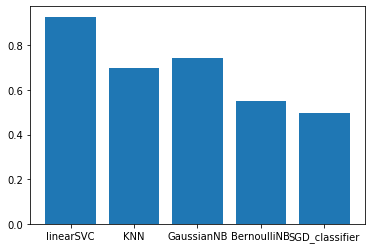

In [49]:
plt.bar(['linearSVC', 'KNN', 'GaussianNB', 'BernoulliNB', 'SGD_classifier'], scores)

### LinearSVC was massively successful. I was pleasantly surprised to see the .93 score, as I was expecting closer to 0.60. Gaussian Naive Bayes also did admirably with a score of 0.75, so it was unexpected to see Bernoulli Naive Bayes drop down to 0.55. The biggest thing I've learned from this project is how much further I have to go to develop an intuition for these things. I have an increased respect for support vector clustering. It's also become increasingly apparent how hard it is to predict the usefulness of data in a dataset with a large amount of features.

# Part III: 1

### This was a survey given to high school students in math and Portuguese classes at two high schools. The data was originally used to assess which students were at risk for not completing high school. The survey includes questions about outgoing behavior. I want to know how the rates of outgoing behavior are reflected by people's enjoyment of dancing, so I will compare the ratio of people who said they are outgoing to the ratios of people who enjoy dancing alone and really like dancing.

### Student alcohol consumption data from https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-mat.csv

### This information is given on the Kaggle page if you are interested

Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - 1 hour)
studytime - weekly study time (numeric: 1 - 10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

Source Information
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

In [50]:
new_data = pd.concat([pd.read_csv('student-mat.csv'), pd.read_csv('student-por.csv')])
new_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
new_data.shape

(1044, 33)

In [52]:
new_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [53]:
new_data.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'paid', 'famsup','nursery', 'higher', 'internet', 'famrel', 'health', 'absences', 'G1', 'G2', 'G3', 'activities', 'romantic', 'freetime'], inplace=True)
new_data.head()

,sex,age,failures,goout,Dalc,Walc
0,F,18,0,4,1,1
1,F,17,0,3,1,1
2,F,15,3,2,2,3
3,F,15,0,2,1,1
4,F,16,0,2,1,2


In [54]:
new_data.rename({'sex':'gender'}, axis='columns', inplace=True)
new_data.head()

,gender,age,failures,goout,Dalc,Walc
0,F,18,0,4,1,1
1,F,17,0,3,1,1
2,F,15,3,2,2,3
3,F,15,0,2,1,1
4,F,16,0,2,1,2


In [55]:
new_data['gender'].unique()

array(['F', 'M'], dtype=object)

In [56]:
new_data.loc[new_data['gender'] == 'F', 'gender'] = 2
new_data.loc[new_data['gender'] == 'M', 'gender'] = 1
new_data = new_data.loc[(new_data['age'] > 14) & (new_data['age'] < 19)]
new_data.head()

,gender,age,failures,goout,Dalc,Walc
0,2,18,0,4,1,1
1,2,17,0,3,1,1
2,2,15,3,2,2,3
3,2,15,0,2,1,1
4,2,16,0,2,1,2


In [57]:
new_df = new_df.loc[(new_df['age'] > 14) & (new_df['age'] < 19)]
OSRI_size = len(new_df)
new_df.shape

(96816, 57)

In [58]:
new_df.shape

(96816, 57)

In [59]:
new_df.drop(columns=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q15', 'Q16', 'Q17','Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q41', 'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country', 'IPC', 'source', 'engnat', 'education', 'race', 'religion', 'hand'], inplace=True)
new_df.head()

,Q14,Q40,age,gender,orientation
0,5,4,18,2,2
2,3,4,18,2,1
4,3,1,16,1,1
6,3,2,16,1,1
7,5,3,17,2,NaN


In [60]:
new_df = pd.concat([new_df, new_data], sort=False)
new_df.head()

,Q14,Q40,age,gender,orientation,failures,goout,Dalc,Walc
0,5.0,4.0,18,2,2,NaN,NaN,NaN,NaN
2,3.0,4.0,18,2,1,NaN,NaN,NaN,NaN
4,3.0,1.0,16,1,1,NaN,NaN,NaN,NaN
6,3.0,2.0,16,1,1,NaN,NaN,NaN,NaN
7,5.0,3.0,17,2,NaN,NaN,NaN,NaN,NaN


# Part III: 2

### Using the two datasets, I want to see how the ratios of people in the given age range that like to dance on their own compared to the ratios of people who really like to dance and the ratio of people who like to go out. To do this, I have restricted the respondents used from the first dataset to age range of the respondents in the second dataset. This should make the groups as similar as possible. While we cannot guarantee that the two datasets have similar respondents, the large size of the first dataset suggests that the traits will generally apply to the second dataset.

# Part III: 3

In [63]:
new_df['solo_dancer'] = 0
new_df.loc[new_df['Q14'] >= 3, 'solo_dancer'] = 1

new_df['dancer'] = 0
new_df.loc[new_df['Q40'] >= 3, 'dancer'] = 1

new_df['dont_go_out'] = 0
new_df.loc[new_df['goout'] < 3, 'dont_go_out'] = 1

new_df.head()

print('solo dancers per joyful dancers: ', new_df['solo_dancer'].sum() / new_df['dancer'].sum())
print('solo dancers per survey population: ', new_df['solo_dancer'].sum() / OSRI_size)
print('joyful dancers people per survey population: ', new_df['dancer'].sum() / OSRI_size)
print('non-outgoing people per survey population: ', new_df['dont_go_out'].sum() / len(new_data))
print('outgoing people per survey population: ', 1 - (new_df['dont_go_out'].sum() / len(new_data)))

solo dancers per joyful dancers:  1.2648202864943712
solo dancers per survey population:  0.6985932077342588
joyful dancers people per survey population:  0.5523260618079656
non-outgoing people per survey population:  0.3069815195071869
outgoing people per survey population:  0.6930184804928131


# Part III: 4

### I was expecting to find that the ratio of people who like to dance alone compared to people who really like to dance was within 0.2 of the ratio of people who didn't like to go out compared to those who do. Instead, I found that more people claim to dance on their own than really enjoy dancing. This result was counterintuitive, but it may be explained by respondents interpreting the dancing alone as small feel good gestures while interpreting really liking dancing as a more involved experience. Perhaps this reflects that a large portion of the surveyed population are shy dancers. 

### There is an interesting comparison between the people who like to dance alone per the survey population compared to the amount of people who like to go out compared to the survey population, both are at about 70%. Assuming that the same ratios apply to each survey population, then somewhere between 56% and 100% of outgoing people like dance alone, significantly more optimistic than the 1% to 100% of non-outgoing people that like dance alone.